In [22]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

ANALYSIS_POSTFIX = "mined_drift_2024-09-09"

In [23]:
with open(f"reports/results/{ANALYSIS_POSTFIX}/cv_results.pickle", "rb") as handle:
    cv_predictions = pickle.load(handle)

with open(f"reports/results/{ANALYSIS_POSTFIX}/test_results_full.pickle", "rb") as handle:
    test_predictions = pickle.load(handle)

with open(f"reports/results/{ANALYSIS_POSTFIX}/test_step2.pickle", "rb") as handle:
    s2_predictions = pickle.load(handle)

In [24]:
def compute_profit(B, C, loss_df, C_Training_300=0, AC_PERF = 0.3, perf_variable="rouge"): 
    loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)

    # Compute Costs
    try:
        miss = loss_df['acceptable_rouge'].value_counts().loc[0]
    except KeyError:
        miss = 0
    try:    
        hits = loss_df['acceptable_rouge'].value_counts().loc[1]
    except KeyError:
        hits = 0

    Profit_ND = hits*B-miss*C-C_Training_300
    return Profit_ND

def compute_profit2(B, C, loss_df, C_Training_300=0, AC_PERF = 0.3, perf_variable="rouge"): 
    loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)

    # Compute Costs
    try:
        miss = loss_df['acceptable_rouge'].value_counts().loc[0]
    except KeyError:
        miss = 0
    try:    
        hits = loss_df['acceptable_rouge'].value_counts().loc[1]
    except KeyError:
        hits = 0

    Profit_ND = hits*B-miss*C-C_Training_300
    return hits, miss


def estimate_profit_from_t(B, C, train_loss_df, test_loss_df, C_Training_300=0, AC_PERF = 0.3, perf_variable="rouge"): 
    train_loss_df.loc[:,'acceptable_rouge'] = (train_loss_df[perf_variable]>=AC_PERF).astype(int)

    # Compute Costs
    try:
        miss = train_loss_df['acceptable_rouge'].value_counts().loc[0]
    except KeyError:
        miss = 0
    try:    
        hits = train_loss_df['acceptable_rouge'].value_counts().loc[1]
    except KeyError:
        hits = 0

    hits_percentage = hits/train_loss_df.shape[0]
    miss_percentage = miss/train_loss_df.shape[0]

    Profit_ND = hits_percentage*test_loss_df.shape[0]*B-miss_percentage*test_loss_df.shape[0]*C-C_Training_300
    return Profit_ND

In [25]:
color_map = {0 : "r",
             1 : "g", 
             2 : "b",
             5 : "orange",
             10: "pink",
             'cluster_[0]' : "gray",
             'cluster_[3]' : "forestgreen",
             'cluster_[0, 3]' : "azure"}

In [28]:
x = np.linspace(0.1, 0.3, 100) #sorted(test_predictions.rouge.values)
y = np.linspace(0.1, 0.5, 10)
# x, y = np.meshgrid(x, y)

# # Create a 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# for model_set in test_predictions.model_set.unique().tolist():
#     model_df = test_predictions.loc[test_predictions.model_set==model_set]
#     Z = compute_profit(B=x, C=y, loss_df=test_predictions.loc[test_predictions.model_set==model_set])
#     surface1 = ax.plot_surface(x, y, Z, color=color_map[model_set], alpha=0.7)

# xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
# zz = np.zeros_like(xx)
# ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

# # Set labels for the axes
# ax.set_xlabel('Minimum Acceptable Rouge')
# ax.set_ylabel('Benefits/Cost Ratio')
# ax.set_zlabel('Profit')

# # Display the plot
# plt.show()

In [29]:
name_map = {0 : "BL-0",
             1 : "BL-1", 
             2 : "BL-2",
             5 : "BL-3",
             10: "BL-4",
             'cluster_[0]' : "BL-5cl",
             'cluster_[3]' : "BL-6cl",
             'cluster_[0, 3]' : "BL-7cl"}

In [30]:
for model_set in test_predictions.model_set.unique().tolist():
    test_predictions.loc[test_predictions["model_set"]==model_set, :]

In [31]:
models_list = [0, 1, 2, 5, 10, 'cluster_[0]', 'cluster_[3]', 'cluster_[0, 3]']
models_list.pop(-1)

for i, model_set in enumerate(models_list):
    
    profits = []
    for MAQ in x:
        profit = compute_profit2(B=0, C=0, loss_df=test_predictions.loc[test_predictions["model_set"]==model_set, :], AC_PERF=MAQ)
        print("MAQ " , MAQ)
        print("Hits " , profit[0])
        print("Miss " , profit[1])

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.1
Hits  1210
Miss  1290
MAQ  0.10202020202020202
Hits  1207
Miss  1293
MAQ  0.10404040404040404
Hits  1207
Miss  1293
MAQ  0.10606060606060606
Hits  1191
Miss  1309
MAQ  0.10808080808080808
Hits  1191
Miss  1309
MAQ  0.1101010101010101
Hits  1191
Miss  1309
MAQ  0.11212121212121212
Hits  1176
Miss  1324
MAQ  0.11414141414141415
Hits  1176
Miss  1324
MAQ  0.11616161616161616
Hits  1176
Miss  1324
MAQ  0.1181818181818182
Hits  1152
Miss  1348
MAQ  0.1202020202020202
Hits  1152
Miss  1348
MAQ  0.12222222222222223
Hits  1151
Miss  1349
MAQ  0.12424242424242425
Hits  1151
Miss  1349
MAQ  0.12626262626262627
Hits  1128
Miss  1372
MAQ  0.12828282828282828
Hits  1128
Miss  1372
MAQ  0.1303030303030303
Hits  1128
Miss  1372
MAQ  0.13232323232323234
Hits  1128
Miss  1372
MAQ  0.13434343434343435
Hits  1083
Miss  1417
MAQ  0.13636363636363635
Hits  1083
Miss  1417
MAQ  0.1383838383838384
Hits  1082
Miss  1418
MAQ  0.14040404040404042
Hits  1082
Miss  1418
MAQ  0.14242424242424243
Hits  108

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.24343434343434345
Hits  439
Miss  2061
MAQ  0.24545454545454545
Hits  439
Miss  2061
MAQ  0.2474747474747475
Hits  439
Miss  2061
MAQ  0.2494949494949495
Hits  439
Miss  2061
MAQ  0.2515151515151515
Hits  379
Miss  2121
MAQ  0.2535353535353535
Hits  379
Miss  2121
MAQ  0.25555555555555554
Hits  379
Miss  2121
MAQ  0.25757575757575757
Hits  379
Miss  2121
MAQ  0.2595959595959596
Hits  379
Miss  2121
MAQ  0.26161616161616164
Hits  379
Miss  2121
MAQ  0.26363636363636367
Hits  379
Miss  2121
MAQ  0.2656565656565657
Hits  379
Miss  2121
MAQ  0.2676767676767677
Hits  356
Miss  2144
MAQ  0.2696969696969697
Hits  356
Miss  2144
MAQ  0.2717171717171717
Hits  356
Miss  2144
MAQ  0.2737373737373737
Hits  356
Miss  2144
MAQ  0.27575757575757576
Hits  356
Miss  2144
MAQ  0.2777777777777778
Hits  356
Miss  2144
MAQ  0.2797979797979798
Hits  356
Miss  2144
MAQ  0.28181818181818186
Hits  356
Miss  2144
MAQ  0.28383838383838383
Hits  356
Miss  2144
MAQ  0.28585858585858587
Hits  302
Miss  2198


/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.19090909090909092
Hits  1285
Miss  1215
MAQ  0.19292929292929295
Hits  1285
Miss  1215
MAQ  0.19494949494949496
Hits  1285
Miss  1215
MAQ  0.19696969696969696
Hits  1285
Miss  1215
MAQ  0.198989898989899
Hits  1285
Miss  1215
MAQ  0.20101010101010103
Hits  1264
Miss  1236
MAQ  0.20303030303030303
Hits  1264
Miss  1236
MAQ  0.20505050505050504
Hits  1264
Miss  1236
MAQ  0.20707070707070707
Hits  1264
Miss  1236
MAQ  0.2090909090909091
Hits  1264
Miss  1236
MAQ  0.2111111111111111
Hits  1235
Miss  1265
MAQ  0.21313131313131314
Hits  1235
Miss  1265
MAQ  0.21515151515151515
Hits  1235
Miss  1265
MAQ  0.21717171717171718
Hits  1235
Miss  1265
MAQ  0.21919191919191922
Hits  1235
Miss  1265
MAQ  0.22121212121212122
Hits  1235
Miss  1265
MAQ  0.22323232323232323
Hits  1185
Miss  1315
MAQ  0.22525252525252526
Hits  1185
Miss  1315
MAQ  0.22727272727272727
Hits  1185
Miss  1315
MAQ  0.2292929292929293
Hits  1185
Miss  1315
MAQ  0.23131313131313133
Hits  1185
Miss  1315
MAQ  0.23333333333

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.1383838383838384
Hits  1661
Miss  839
MAQ  0.14040404040404042
Hits  1661
Miss  839
MAQ  0.14242424242424243
Hits  1661
Miss  839
MAQ  0.14444444444444446
Hits  1542
Miss  958
MAQ  0.14646464646464646
Hits  1542
Miss  958
MAQ  0.1484848484848485
Hits  1542
Miss  958
MAQ  0.1505050505050505
Hits  1542
Miss  958
MAQ  0.15252525252525254
Hits  1542
Miss  958
MAQ  0.15454545454545454
Hits  1443
Miss  1057
MAQ  0.15656565656565657
Hits  1443
Miss  1057
MAQ  0.1585858585858586
Hits  1443
Miss  1057
MAQ  0.1606060606060606
Hits  1443
Miss  1057
MAQ  0.16262626262626262
Hits  1443
Miss  1057
MAQ  0.16464646464646465
Hits  1443
Miss  1057
MAQ  0.16666666666666669
Hits  1379
Miss  1121
MAQ  0.1686868686868687
Hits  1378
Miss  1122
MAQ  0.1707070707070707
Hits  1378
Miss  1122
MAQ  0.17272727272727273
Hits  1378
Miss  1122
MAQ  0.17474747474747476
Hits  1378
Miss  1122
MAQ  0.17676767676767677
Hits  1378
Miss  1122
MAQ  0.17878787878787877
Hits  1378
Miss  1122
MAQ  0.1808080808080808
Hits

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.28787878787878785
Hits  777
Miss  1723
MAQ  0.2898989898989899
Hits  777
Miss  1723
MAQ  0.2919191919191919
Hits  777
Miss  1723
MAQ  0.29393939393939394
Hits  777
Miss  1723
MAQ  0.295959595959596
Hits  777
Miss  1723
MAQ  0.297979797979798
Hits  777
Miss  1723
MAQ  0.3
Hits  777
Miss  1723
MAQ  0.1
Hits  2103
Miss  397
MAQ  0.10202020202020202
Hits  2095
Miss  405
MAQ  0.10404040404040404
Hits  2095
Miss  405
MAQ  0.10606060606060606
Hits  2077
Miss  423
MAQ  0.10808080808080808
Hits  2077
Miss  423
MAQ  0.1101010101010101
Hits  2077
Miss  423
MAQ  0.11212121212121212
Hits  2035
Miss  465
MAQ  0.11414141414141415
Hits  2035
Miss  465
MAQ  0.11616161616161616
Hits  2035
Miss  465
MAQ  0.1181818181818182
Hits  1967
Miss  533
MAQ  0.1202020202020202
Hits  1967
Miss  533
MAQ  0.12222222222222223
Hits  1967
Miss  533
MAQ  0.12424242424242425
Hits  1967
Miss  533
MAQ  0.12626262626262627
Hits  1839
Miss  661
MAQ  0.12828282828282828
Hits  1839
Miss  661
MAQ  0.1303030303030303
Hits 

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.23535353535353537
Hits  1184
Miss  1316
MAQ  0.23737373737373738
Hits  1184
Miss  1316
MAQ  0.2393939393939394
Hits  1184
Miss  1316
MAQ  0.24141414141414141
Hits  1184
Miss  1316
MAQ  0.24343434343434345
Hits  1184
Miss  1316
MAQ  0.24545454545454545
Hits  1184
Miss  1316
MAQ  0.2474747474747475
Hits  1184
Miss  1316
MAQ  0.2494949494949495
Hits  1184
Miss  1316
MAQ  0.2515151515151515
Hits  1051
Miss  1449
MAQ  0.2535353535353535
Hits  1051
Miss  1449
MAQ  0.25555555555555554
Hits  1051
Miss  1449
MAQ  0.25757575757575757
Hits  1051
Miss  1449
MAQ  0.2595959595959596
Hits  1051
Miss  1449
MAQ  0.26161616161616164
Hits  1051
Miss  1449
MAQ  0.26363636363636367
Hits  1051
Miss  1449
MAQ  0.2656565656565657
Hits  1051
Miss  1449
MAQ  0.2676767676767677
Hits  926
Miss  1574
MAQ  0.2696969696969697
Hits  926
Miss  1574
MAQ  0.2717171717171717
Hits  926
Miss  1574
MAQ  0.2737373737373737
Hits  925
Miss  1575
MAQ  0.27575757575757576
Hits  925
Miss  1575
MAQ  0.2777777777777778
Hits 

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.18282828282828284
Hits  1374
Miss  1126
MAQ  0.18484848484848487
Hits  1374
Miss  1126
MAQ  0.18686868686868688
Hits  1374
Miss  1126
MAQ  0.18888888888888888
Hits  1374
Miss  1126
MAQ  0.19090909090909092
Hits  1369
Miss  1131
MAQ  0.19292929292929295
Hits  1369
Miss  1131
MAQ  0.19494949494949496
Hits  1369
Miss  1131
MAQ  0.19696969696969696
Hits  1369
Miss  1131
MAQ  0.198989898989899
Hits  1369
Miss  1131
MAQ  0.20101010101010103
Hits  1337
Miss  1163
MAQ  0.20303030303030303
Hits  1337
Miss  1163
MAQ  0.20505050505050504
Hits  1337
Miss  1163
MAQ  0.20707070707070707
Hits  1337
Miss  1163
MAQ  0.2090909090909091
Hits  1337
Miss  1163
MAQ  0.2111111111111111
Hits  1305
Miss  1195
MAQ  0.21313131313131314
Hits  1305
Miss  1195
MAQ  0.21515151515151515
Hits  1305
Miss  1195
MAQ  0.21717171717171718
Hits  1305
Miss  1195
MAQ  0.21919191919191922
Hits  1305
Miss  1195
MAQ  0.22121212121212122
Hits  1305
Miss  1195
MAQ  0.22323232323232323
Hits  1248
Miss  1252
MAQ  0.2252525252

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.1303030303030303
Hits  1899
Miss  601
MAQ  0.13232323232323234
Hits  1899
Miss  601
MAQ  0.13434343434343435
Hits  1896
Miss  604
MAQ  0.13636363636363635
Hits  1896
Miss  604
MAQ  0.1383838383838384
Hits  1896
Miss  604
MAQ  0.14040404040404042
Hits  1896
Miss  604
MAQ  0.14242424242424243
Hits  1896
Miss  604
MAQ  0.14444444444444446
Hits  1886
Miss  614
MAQ  0.14646464646464646
Hits  1886
Miss  614
MAQ  0.1484848484848485
Hits  1886
Miss  614
MAQ  0.1505050505050505
Hits  1886
Miss  614
MAQ  0.15252525252525254
Hits  1886
Miss  614
MAQ  0.15454545454545454
Hits  1850
Miss  650
MAQ  0.15656565656565657
Hits  1850
Miss  650
MAQ  0.1585858585858586
Hits  1850
Miss  650
MAQ  0.1606060606060606
Hits  1850
Miss  650
MAQ  0.16262626262626262
Hits  1850
Miss  650
MAQ  0.16464646464646465
Hits  1850
Miss  650
MAQ  0.16666666666666669
Hits  1763
Miss  737
MAQ  0.1686868686868687
Hits  1763
Miss  737
MAQ  0.1707070707070707
Hits  1763
Miss  737
MAQ  0.17272727272727273
Hits  1763
Miss  

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

MAQ  0.2777777777777778
Hits  930
Miss  1570
MAQ  0.2797979797979798
Hits  930
Miss  1570
MAQ  0.28181818181818186
Hits  930
Miss  1570
MAQ  0.28383838383838383
Hits  930
Miss  1570
MAQ  0.28585858585858587
Hits  885
Miss  1615
MAQ  0.28787878787878785
Hits  885
Miss  1615
MAQ  0.2898989898989899
Hits  885
Miss  1615
MAQ  0.2919191919191919
Hits  885
Miss  1615
MAQ  0.29393939393939394
Hits  885
Miss  1615
MAQ  0.295959595959596
Hits  885
Miss  1615
MAQ  0.297979797979798
Hits  885
Miss  1615
MAQ  0.3
Hits  885
Miss  1615
MAQ  0.1
Hits  1901
Miss  599
MAQ  0.10202020202020202
Hits  1823
Miss  677
MAQ  0.10404040404040404
Hits  1823
Miss  677
MAQ  0.10606060606060606
Hits  1735
Miss  765
MAQ  0.10808080808080808
Hits  1735
Miss  765
MAQ  0.1101010101010101
Hits  1735
Miss  765
MAQ  0.11212121212121212
Hits  1645
Miss  855
MAQ  0.11414141414141415
Hits  1645
Miss  855
MAQ  0.11616161616161616
Hits  1644
Miss  856
MAQ  0.1181818181818182
Hits  1516
Miss  984
MAQ  0.1202020202020202
Hits  

/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

/tmp/ipykernel_3377963/2538797853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df.loc[:,'acceptable_rouge'] = (loss_df[perf_variable]>=AC_PERF).astype(int)
/tmp/ipykernel_3377963/2538797853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

<Axes: xlabel='MAQ', ylabel='Profit'>

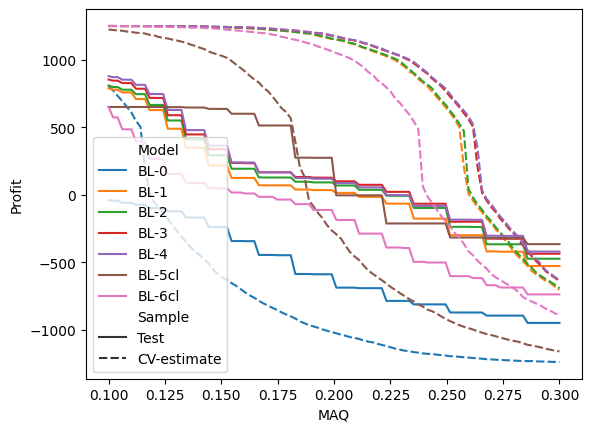

In [32]:
B = 0.5
C = 1 - B
profit_per_strategy_true = {}
models_list = [0, 1, 2, 5, 10, 'cluster_[0]', 'cluster_[3]', 'cluster_[0, 3]']
models_list.pop(-1)

for i, model_set in enumerate(models_list):
    
    profits = []
    for MAQ in x:
        profit = compute_profit(B=B, C=C, loss_df=test_predictions.loc[test_predictions["model_set"]==model_set, :], AC_PERF=MAQ)
        profits.append(profit)
        
    profit_per_strategy_true[model_set] = np.array(profits)

    if i==0:
        pred_df = pd.DataFrame(data={"MAQ": x, "Profit":  np.array(profits), "Model": name_map[model_set], "Sample" : "Test"})
    else: 
        pred_df = pd.concat([pred_df, pd.DataFrame(data={"MAQ": x, "Profit":  np.array(profits), "Model": name_map[model_set], "Sample" : "Test"})])

# profit_per_strategy_true = {}

# for i, model_set in enumerate(models_list):
    
#     profits = []
#     for MAQ in x:
#         profit = compute_profit(B=B, C=C, loss_df=s2_predictions.loc[s2_predictions["model_set"]==model_set, :], AC_PERF=MAQ, perf_variable="meta")
#         profits.append(profit)
        
#     profit_per_strategy_true[model_set] = np.log10(np.array(profits))

#     pred_df = pd.concat([pred_df, pd.DataFrame(data={"MAQ": x, "Profit":  np.array(profits), "Model": name_map[model_set], "Sample" : "Meta"})])

profit_per_strategy_true = {}
for i, model_set in enumerate(models_list):
    
    profits = []
    for MAQ in x:
        #profit = estimate_profit_from_t(B=B, C=C,train_loss_df= cv_predictions.loc[cv_predictions["model_set"]==model_set, :], test_loss_df=test_predictions.loc[test_predictions["model_set"]==model_set, :], AC_PERF=MAQ, perf_variable="rouge")
        profit = compute_profit(B=B, C=C, loss_df=cv_predictions.loc[cv_predictions["model_set"]==model_set, :], AC_PERF=MAQ, perf_variable="catboost_perf_hat")
        profits.append(profit)
        
    profit_per_strategy_true[model_set] = np.array(profits)*(2500/7000)

    pred_df = pd.concat([pred_df, pd.DataFrame(data={"MAQ": x, "Profit":  np.array(profits)*(2500/7000), "Model": name_map[model_set], "Sample" : "CV-estimate"})])

sns.lineplot(data = pred_df, x="MAQ", y="Profit", hue="Model", style="Sample")
